# LAB 4: Reflection, Transmission, Tunneling
**Date: 02-02-23**

> **AIM:** <br>
> To study the reflected and transmitted wavefuntions & probability densities of a quantum particle of Energy $E$ incident on a rectangular potential barrier of height $V$. Also to investigate the effect of barrier thickness and understand the concept of tunnelling.t.

In [1]:
import numpy as np
import sympy as sp
from scipy.constants import *
from cmath import *

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ipywidgets as widgets

import random
from fractions import Fraction

In [5]:
E,m = 0.5,1
barrier = (0.5,0.6,1);
x_lim = (0,1);
res = 200
#k1 = (2*m*E/hbar**2)**0.5
#k2 = (2*m*(E-V)/hbar**2)**0.5

def V(x,barrier = (0.5,0.6,1)):
    assert barrier[0] < barrier[1]
    return barrier[-1] if(barrier[0] < x  < barrier[1]) else 0

def wavePacketStatic(x,E = 0.5,x0 = 0.2,dist = 0.01,k = 1):
    return E*np.exp(-0.5*((x - x0)/dist)**2)*np.exp(-1j*k*x)

def wavePacket(E = 0.5,m = 1, barrier = (0.5,0.6,1), x_lim = (0,1), res = 500):
    #SOLVING FOR COEFF
    Ai = 1
    
    k1,k2,a1,a2 = sp.symbols("k1,k2,a1,a2")
    Ar,Br,Bt,Ct = sp.symbols("Ar,Br,Bt,Ct",real = True)
    x = sp.Symbol("x",real = True)
    
    psi1 = Ai*sp.exp(1j*k1*x) + Ar*sp.exp(-1j*k1*x)
    psi2 = Bt*sp.exp(k2*x) + Br*sp.exp(-k2*x)
    psi3 = Ct*sp.exp(1j*k1*x)
    
    B1 = sp.Eq(psi1,psi2).subs({x:a1})
    B2 = sp.Eq(sp.diff(psi1,x),sp.diff(psi2,x)).subs({x:a1})
    B3 = sp.Eq(psi2,psi3).subs({x:a2})
    B4 = sp.Eq(sp.diff(psi2,x),sp.diff(psi3,x)).subs({x:a2})
    
    solution = sp.solve([B1,B2,B3,B4],Ar,Br,Bt,Ct,dict = True)[0]

    V0 = barrier[-1]
    data = {
        a1 : barrier[0],
        a2 : barrier[1],
        k1 : (2*m*m_e*E*eV/hbar**2)**0.5,
        k2 : (2*m*m_e*(E-V0)*eV/hbar**2)**0.5    
    }
    
    #solution |= data
    
    #psi1 = sp.lambdify(x,psi1.subs(solution).simplify());
    #psi2 = sp.lambdify(x,psi2.subs(solution).simplify());
    #psi3 = sp.lambdify(x,psi3.subs(solution).simplify());

    #print("LAMBDIFIED")

    
    #psi = sp.Piecewise((psi1.subs({x:x}), x <= barrier[0]),
    #                   (psi2.subs({x:x}), x <= barrier[1]),
    #                   (psi3.subs({x:x}), True)))
    psi = sp.Piecewise((psi1, x <= barrier[0]),
                       (psi2, x <= barrier[1]),
                       (psi3, True)).subs(solution)
    print("Piecewise Created")

   # sp.plot(psi,(x,0,1))
    return psi
    #return sp.lambdify(x,psi)
    #wavePrinting(x_lim,res,sp.lambdify(x,psi))
    

def wavePrinting(x_lim,res,psi):
    X = np.linspace(*x_lim,res)
    PSI = []
    #print(psi)
    #print(psi.subs({x:0}).simplify(),type(psi.subs({x:0})))
    
    #for i in X:
        #PSI.append(psi.subs({x:i}).as_real_imag())

    PSI = [psi(i) for i in X]
    
    print("WAVEFUNCTION EVALUATED")
    
    fig = plt.figure(figsize = (10,4))
    plt.plot(X,list(map(lambda x:V(x,barrier),X)), label = "Potential")

    assert len(X) == len(PSI)
    plt.plot(X,PSI,label = "Wavefunction")
    #plt.plot(X,[i[0] for i in PSI],label = "REAL")
    #plt.plot(X,[i[1] for i in PSI],label = "IMAGINARY")
    
    plt.grid()
    plt.axhline(color = "black")
    plt.xlim(x_lim)
    plt.legend(fontsize = 9)
    #plt.savefig("Wavefunction")
    plt.show()

psi = wavePacket()
psi
#wavePacket()

Piecewise Created


Piecewise(((k1**2*exp(2.0*a1*k2)*exp(2.0*I*a1*k1)/(k1**2*exp(2.0*a1*k2) - k1**2*exp(2.0*a2*k2) - 2.0*I*k1*k2*exp(2.0*a1*k2) - 2.0*I*k1*k2*exp(2.0*a2*k2) - k2**2*exp(2.0*a1*k2) + k2**2*exp(2.0*a2*k2)) - k1**2*exp(2.0*a2*k2)*exp(2.0*I*a1*k1)/(k1**2*exp(2.0*a1*k2) - k1**2*exp(2.0*a2*k2) - 2.0*I*k1*k2*exp(2.0*a1*k2) - 2.0*I*k1*k2*exp(2.0*a2*k2) - k2**2*exp(2.0*a1*k2) + k2**2*exp(2.0*a2*k2)) + k2**2*exp(2.0*a1*k2)*exp(2.0*I*a1*k1)/(k1**2*exp(2.0*a1*k2) - k1**2*exp(2.0*a2*k2) - 2.0*I*k1*k2*exp(2.0*a1*k2) - 2.0*I*k1*k2*exp(2.0*a2*k2) - k2**2*exp(2.0*a1*k2) + k2**2*exp(2.0*a2*k2)) - k2**2*exp(2.0*a2*k2)*exp(2.0*I*a1*k1)/(k1**2*exp(2.0*a1*k2) - k1**2*exp(2.0*a2*k2) - 2.0*I*k1*k2*exp(2.0*a1*k2) - 2.0*I*k1*k2*exp(2.0*a2*k2) - k2**2*exp(2.0*a1*k2) + k2**2*exp(2.0*a2*k2)))*exp(-1.0*I*k1*x) + exp(1.0*I*k1*x), x <= 0.5), ((2.0*k1**2*exp(a1*k2)*exp(I*a1*k1)/(k1**2*exp(2.0*a1*k2) - k1**2*exp(2.0*a2*k2) - 2.0*I*k1*k2*exp(2.0*a1*k2) - 2.0*I*k1*k2*exp(2.0*a2*k2) - k2**2*exp(2.0*a1*k2) + k2**2*exp(2.0*a2*k

In [6]:
X = [0,0.05,0.5,0.51,0.6,0.61,0.7,1]
#dict(zip(X,[psi(x) for x in X]))
#dict(map(psi,X))

In [7]:
def plotWave(n = [0,1,2],barrier = (0.5,0.6,1),x_lim = (0,1),res = 500):
    fig = plt.figure(figsize = (10,4))
    
    X = np.linspace(*x_lim,res)    

    Vx = list(map(lambda x:V(x,barrier),X))
    
    psi = list(map(wavePacket,X))
    plt.plot(X,Vx, label = "Potential")
    plt.plot(X,psi)
    psi = forwardStep(psi,Vx)
    #plt.plot(X,psi)
    psi = forwardStep(psi,Vx)
    #plt.plot(X,psi)
    psi = forwardStep(psi,Vx)
    #plt.plot(X,psi)
    psi = forwardStep(psi,Vx)
    #plt.plot(X,psi)
    psi = forwardStep(psi,Vx)
    plt.plot(X,psi)
    
    plt.grid()
    #xloc = plt.xticks()[0]
    #plt.xticks(ticks = xloc, labels = [f"{Fraction(i)}A" for i in xloc])
    plt.axhline(color = "black")
    plt.xlim(x_lim)
    plt.legend(fontsize = 9)
    #plt.savefig("Wavefunction")
    plt.show()

plotWave()

C:\Users\Pradyumna\AppData\Local\Temp\ipykernel_12516\3838456577.py:39: RuntimeWarning: invalid value encountered in double_scalars
  k2 : (2*m*m_e*(E-V0)*eV/hbar**2)**0.5


Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created
Piecewise Created


KeyboardInterrupt: 

<Figure size 1000x400 with 0 Axes>

 a half-step in $x$: $\psi_n \longleftarrow \psi_n \exp[-i (\Delta t / 2) (V_n / \hbar)]$

$\widetilde{\psi}_m$ from $\psi_n$ using the FFT.

 full-step in $k$: $\widetilde{\psi}_m \longleftarrow \widetilde{\psi}_m \exp[-i \hbar (k \cdot k) \Delta t / (2 m)]$

 $\psi_n$ from $\widetilde{\psi}_m$ using the inverse FFT.

 a second half-step in $x$: $\psi_n \longleftarrow \psi_n \exp[-i (\Delta t / 2)(V_n / \hbar)]$

**USING HAMILTONIAN MATRIX**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from dataclasses import dataclass,field,fields,asdict
from typing import *
import ipywidgets as widgets

import scipy.constants as constants
from timeit import timeit
import time

In [3]:
@dataclass(kw_only=True)
class waveParamenters:
    m : int = field(default = constants.m_e, init = False, metadata = "Mass")
    hbar : int  = field(default = constants.hbar, init = False, metadata = "Reduced Plancks Constant")
    x : "numpy.Array" = field(init = False, repr = False, metadata = "x")
    psi0 : "numpy.Array" = field(init = False, repr = False, metadata = "Initial Wave function")
    V : "numpy.Array" = field(init = False,repr = False, metadata = "Potential")
    psi : "callable" = field(default = lambda t : None,init = False, repr = False, metadata = r"\psi(t)")

    #USER DEFINED VALUES
    p : int = field(default = 0.2, metadata = "Momentum")
    x_range : Tuple[int, int] = field(default = (-6.5,6.5), metadata = "Range of Wave")
    res : int  = field(default = 1000, metadata= "Resolution")
    V0 : float = field(default = None, metadata = "Height of Barrier")
    barrier: Tuple[int, int] = field(default = (0,0.5), metadata = "Potential Barrier")

    gauss_param : Tuple[Annotated[float,"sigma"], Annotated[float, "x0"]] = field(default = (0.15,-2))

    def __post_init__(self):
        self.p *= (constants.eV*constants.m_e)**0.5
        self.x = np.linspace(*self.x_range,self.res)*constants.nano
        self.barrier = np.array(self.barrier)*constants.nano
        self.gauss_param = np.array(self.gauss_param)*constants.nano
        gaussian = lambda : np.exp(-((self.x[1:-1] - self.gauss_param[-1])**2)/(self.gauss_param[0]**2))
        
        self.psi0 = np.concatenate(([0],gaussian()*np.exp(1j*self.p*(self.x[1:-1] + self.gauss_param[1])),[0]))
    
        if(self.V0 == None):
            self.V0 = self.p**2/(2*self.m)
        else:
            self.V0 *= constants.eV
        
        
        self.V = np.where((self.x < self.barrier[0]) | (self.x > self.barrier[1]), 0, self.V0)

        self.dx = self.x[1] - self.x[0]

        #self.z = (self.hbar**2/(self.m*self.dx**2))*np.diag(np.ones(self.res-1))+self.V[1:]*np.diag(np.ones(self.res-1))+(-self.hbar**2/(2*self.m*self.dx**2))*np.diag(np.ones(self.res-2),1)+(-self.hbar**2/(2*self.m*self.dx**2))*np.diag(np.ones(self.res-2),-1)
        k_ = -self.hbar**2/(2*self.m * self.dx**2)
        #print([(v,x) for v,x in zip(self.V,range(self.res))])
        
        #self.H = np.array([np.pad(np.array([-0.5*k,v+k,-0.5*k],dtype = "float"), pad_width = (x,self.res-x),mode = "constant") for v,x in zip(self.V,range(self.res))])[:,1:-2]
        start = time.time()
        self.H = np.diag(k_*np.ones(self.res - 1),k = 1)+np.diag(-2*k_+self.V)+ np.diag(k_*np.ones(self.res - 1),k = -1)
        
        self.E,self.psi_c = np.linalg.eigh(self.H)
        self.psi_c = self.psi_c.T
        
        
        
        #DECOMPSOING WAVEFUNCTION
        self.psi_c = np.array([np.sum(np.conj(psi)*self.psi0*self.dx)*psi for psi in self.psi_c])

        self.psi = lambda t,dt: np.sum([self.psi_c[i]*np.exp((-1j*self.E[i]*t)/self.hbar) for i in range(self.res)],axis = 0)
        end = time.time()
        
        #print((end - start)/(750*750)*5000*5000)
        
    
    def TimeDepWaves(self, t_values):
        psi_t = np.empty((len(t_values), len(self.x)), dtype=np.complex128)
        for i, t in enumerate(t_values):
            psi_t[i] = self.psi(t, 0)
        return psi_t
        
    def coeffs(self,t):
        psiT = self.psi(t)
        

In [4]:
w_ = waveParamenters(p= 1,gauss_param=(0.5,-2), V0 = 1.5,res = 1000,barrier = (0,1))

In [33]:
def plotWave(t,w):
    fig = plt.figure()
    plt.ylim(0,2e-11)
        #plt.plot(w.x,w.psi0.real, label = "real")
        #plt.plot(w.x,w.psi0.imag, label = "imag")
        #plt.plot(w.x,abs(w.psi0), label = "abs")
    
    plt.plot(w.x,w.V*1e8, label = "Potential")
    #plt.plot(w.x,abs(w.psi(t,0))**2, label = r"$Probability Density$",linewidth = 1.8)
    plt.plot(w.x,abs(w.psi(t,0)), label = r"$\psi(x,t)$")
    #plt.plot(w.x,(w.psi(t,0).real)*1e2, label = r"$Real \psi(x,t)$")
    #plt.plot(w.x,(w.psi(t,0).imag)*1e2, label = r"$Imaginary \psi(x,t)$")
    
    
    
    plt.xlabel("Position (x)")
    plt.title('Time Evolution across Potential Barrier')
    plt.plot()
    plt.grid()
    plt.legend()
    #plt.show()
    return plt


widgets.interactive(plotWave,t = widgets.FloatSlider(min = 0, max = 1.5e-14,step = 1e-18,value = 0,readout_format = ".2e" ),
                    w = widgets.fixed(waveParamenters(p=1e10,gauss_param=(1,-2), V0 = 0.5,res = 1000,barrier = (0,0.5))))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.5e-14, readout_format='.2e', step=1e-18), …

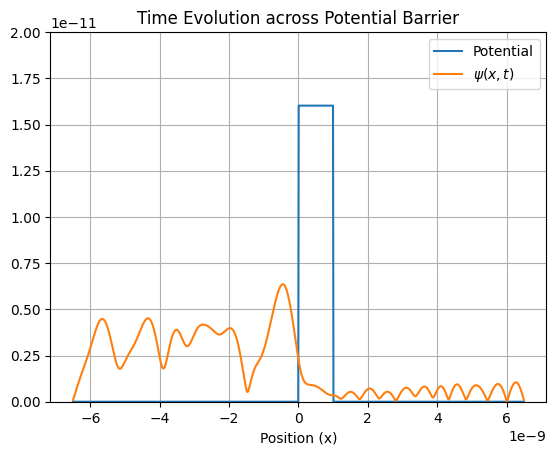

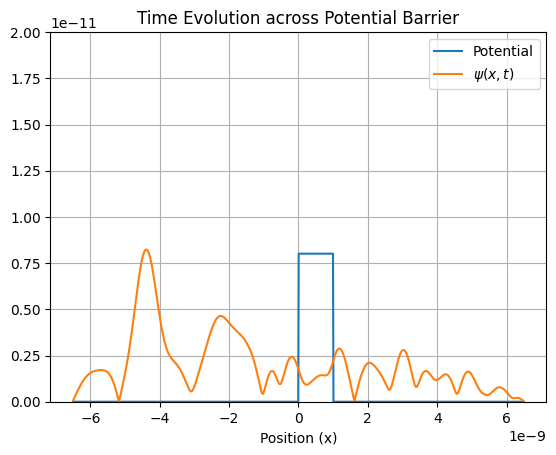

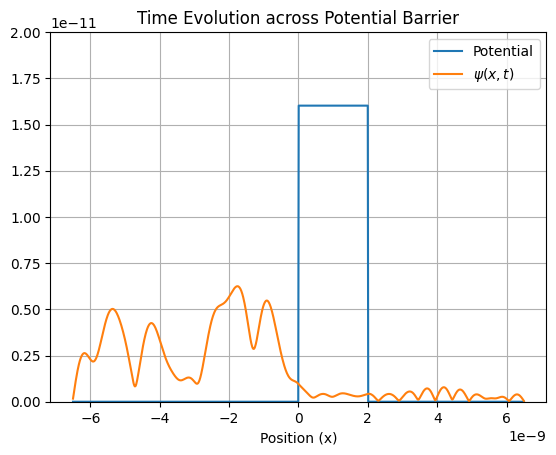

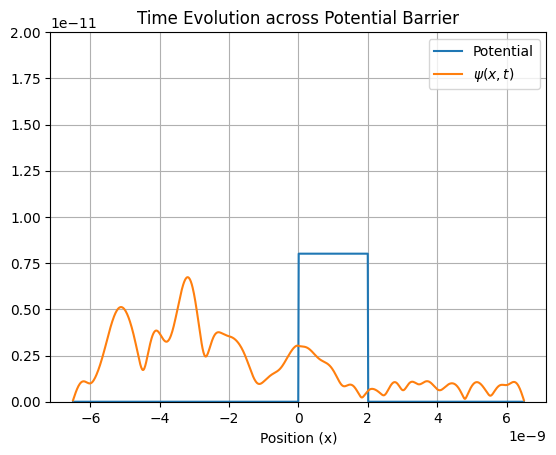

In [42]:
t = 0.7e-4
plotWave(t,waveParamenters(p = 1000,gauss_param=(0.4,-2), V0 = 1,res = 1000,barrier = (0,1))).savefig("1")
plotWave(t,waveParamenters(p = 1000,gauss_param=(0.4,-2), V0 = 0.5,res = 1000,barrier = (0,1))).savefig("2")
plotWave(t,waveParamenters(p = 1000,gauss_param=(0.4,-2), V0 = 1,res = 1000,barrier = (0,2))).savefig("3")
plotWave(t,waveParamenters(p = 1000,gauss_param=(0.4,-2), V0 = 0.5,res = 1000,barrier = (0,2))).savefig("4")